In [411]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/home/linuxbrew/.linuxbrew/Cellar/python/2.7.12_1/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [412]:
bootEMPath="/mnt/scratch7/avi/test/shoal-paper/salmonData/test/emBoot/aux_info/"
gibbsEMPath="/mnt/scratch7/avi/test/shoal-paper/salmonData/test/emGibbs/aux_info/"
bootVBEMPath="/mnt/scratch7/avi/test/shoal-paper/salmonData/test/vbBoot/aux_info/"
gibbsVBEMPath="/mnt/scratch7/avi/test/shoal-paper/salmonData/test/vbGibbs/aux_info/"

In [413]:
bootEMFiles=[bootEMPath+str(x)+'.sf' for x in range(1,101)]
gibbsEMFiles=[gibbsEMPath+str(x)+'.sf' for x in range(1,101)]
bootVBEMFiles=[bootVBEMPath+str(x)+'.sf' for x in range(1,101)]
gibbsVBEMFiles=[gibbsVBEMPath+str(x)+'.sf' for x in range(1,101)]
eqFile="/mnt/scratch7/avi/test/shoal-paper/salmonData/test/emGibbs/aux_info/eq_classes.txt"

In [414]:
def readFiles(paths):
    for index, path in enumerate(paths):
        with open(path) as f:
            if index == 0:
                tpm = pd.read_table(f, header=0).set_index("Name").rename(columns={'TPM': '0'}).drop(['Length','EffectiveLength','NumReads'], 1)
            else:
                tpm[index] = pd.read_table(f, header=0).set_index("Name").drop(['Length','EffectiveLength','NumReads'], 1)
    return tpm
def readTruth(tfile):
    with open(tfile) as f:
        tpm = pd.read_table(f, header=0).set_index("Name")['TPM']
    return tpm
def dist_is_between(dist, truth):
    dist = sorted(dist)
    is_bet = []
    for skip in range(1, 25):
        if dist[skip] <= truth and truth <=dist[-(skip+1)]:
            is_bet.append(True)
        else:
            is_bet.append(False)
    return is_bet
def get_bet(var):
    bet = []
    for txp in var.index:
        dist = var.loc[txp]
        truth = truthData[txp]
        bet.append(dist_is_between(dist, truth))
    return bet
def get_series(df):
    series = []
    for txp in df.index:
        dist = sorted(df.loc[txp])
        cv=[]
        for skip in range(1, 25):
            ndist = np.array(dist[skip:-skip])
            cv.append(ndist.std()/ndist.mean())
        series.append(cv)
    return series
def readEqClass(eqfile):
    eqClasses = {}    
    tnames = []

    with open(eqfile) as ifile:
        numTran = int(ifile.readline().rstrip())
        numEq = int(ifile.readline().rstrip())
        for i in xrange(numTran):
            tnames.append(ifile.readline().rstrip())

        for i in xrange(numEq):
            toks = map(int, ifile.readline().rstrip().split('\t'))
            nt = toks[0]
            tids = tuple(toks[1:-1])
            count = toks[-1]
            if tids in eqClasses:
                eqClasses[tids] += count
            else:
                eqClasses[tids] = count
    return eqClasses,tnames

In [415]:
bootEMData = readFiles(bootEMFiles)
gibbsEMData = readFiles(gibbsEMFiles)
bootVBEMData = readFiles(bootVBEMFiles)
gibbsVBEMData = readFiles(gibbsVBEMFiles)

In [432]:
tr = 'ENST00000472311.6|ENSG00000112695.11|OTTHUMG00000015049.8|OTTHUMT00000041246.2|COX7A2-006|COX7A2|325|UTR5:1-51|CDS:52-282|UTR3:283-325|'

In [448]:
b = bootEMData
g = gibbsEMData
# b = bootVBEMData
# g = gibbsVBEMData
eq,tn = readEqClass(eqFile)

setUniTxps = set([])
setMMTxps = set([])
for txps in eq:
    if len(txps) == 1:
        setUniTxps.add(tn[txps[0]])
    else:
        for txp in txps:
            setMMTxps.add(tn[txp])

setBothTxps = setUniTxps & setMMTxps
setUniTxps = setUniTxps - setBothTxps
setMMTxps = setMMTxps - setBothTxps
setAlltxps = setBothTxps|setUniTxps|setMMTxps
setNoMapTxps = [x not in setAlltxps for x in tn]

In [417]:
len(setMMTxps)+len(setUniTxps)+len(setBothTxps)+sum(setNoMapTxps)

94359

In [360]:
#No mapping for txps

In [361]:
boolList = setNoMapTxps

In [362]:
sum(boolList)

7870

In [363]:
sb = b[boolList]
sg = g[boolList]

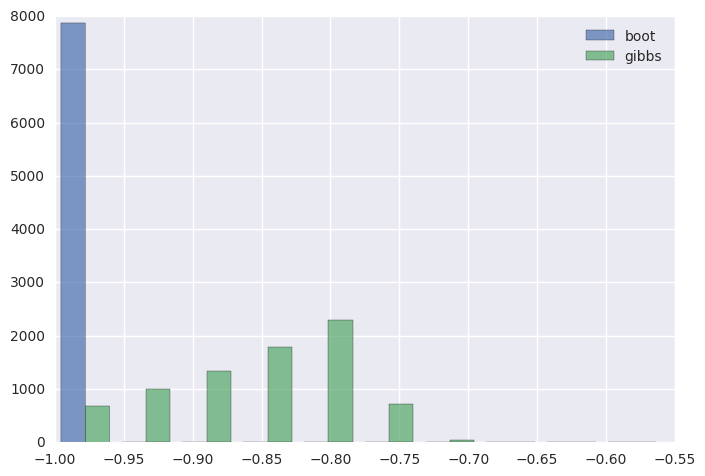

In [364]:
x = np.log10(sb.median(1).values+0.1)
y = np.log10(sg.median(1).values+0.1)
data = np.vstack([x, y]).T

plt.hist(data, alpha=0.7, label=['boot', 'gibbs'])
plt.legend(loc='upper right')

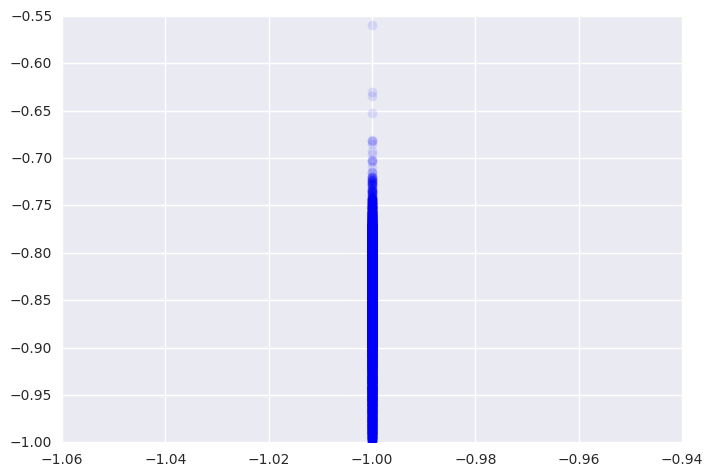

In [365]:
plt.plot(x,y, 'bo', alpha=.1)

#UNIQUE ONLY

In [366]:
boolList = [x in setUniTxps for x in tn] 
print sum(boolList)

2741


In [367]:
sb = b[boolList]
sg = g[boolList]

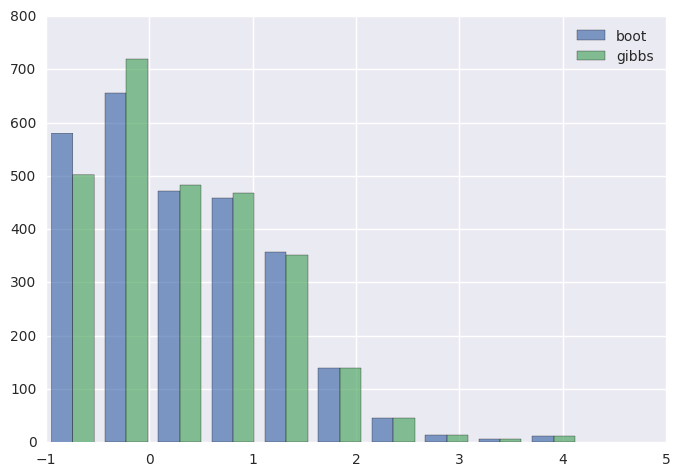

In [368]:
x = np.log10(sb.median(1).values+0.1)
y = np.log10(sg.median(1).values+0.1)
data = np.vstack([x, y]).T

plt.hist(data, alpha=0.7, label=['boot', 'gibbs'])
plt.legend(loc='upper right')

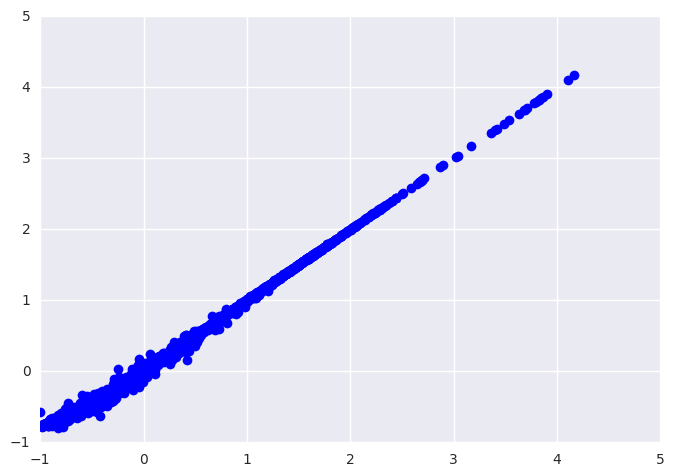

In [369]:
plt.plot(x,y, 'bo')

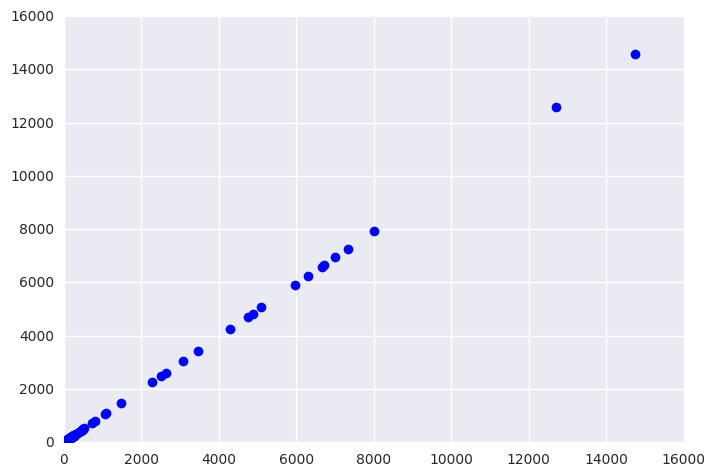

In [370]:
plt.plot(sb.median(1),sg.median(1), 'bo', alpha=1)

In [371]:
diff = sb.median(1) - sg.median(1)

In [372]:
sb[(diff>10) & (sg.median(1)<4000)]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Name,,,,,,,,,,,,,,,,,,,,,
ENST00000233143.5|ENSG00000034510.5|OTTHUMG00000130027.6|OTTHUMT00000252302.3|TMSB10-001|TMSB10|496|UTR5:1-109|CDS:110-244|UTR3:245-496|,1516.071142,1464.971580,1534.044092,1477.658368,1493.869264,1522.062125,1483.296940,1456.866132,1459.685419,1511.137391,...,1502.679533,1529.110341,1496.688550,1516.775964,1507.965694,1466.733634,1495.631317,1536.863378,1504.089176,1464.266759
ENST00000390237.2|ENSG00000211592.8|OTTHUMG00000151684.1|OTTHUMT00000323482.1|IGKC-001|IGKC|523|CDS:1-323|UTR3:324-523|,3475.186503,3446.721656,3398.455177,3432.179832,3457.241273,3483.849717,3452.600266,3485.087319,3443.008850,3462.191681,...,3437.749041,3455.384870,3492.203531,3503.651350,3442.080648,3439.296044,3483.849717,3439.605444,3470.236095,3451.981465
ENST00000230050.3|ENSG00000112306.7|OTTHUMG00000015593.3|OTTHUMT00000042270.2|RPS12-001|RPS12|631|UTR5:1-210|CDS:211-609|UTR3:610-631|,2677.864542,2626.523042,2609.894216,2680.358866,2602.619105,2583.703816,2649.179817,2593.888971,2615.714305,2637.331779,...,2618.624350,2633.590293,2625.691601,2616.130026,2630.472388,2624.860160,2646.893354,2617.585048,2640.449684,2662.898599
ENST00000331825.10|ENSG00000087086.14|OTTHUMG00000183332.1|OTTHUMT00000466233.1|FTL-001|FTL|878|UTR5:1-207|CDS:208-735|UTR3:736-878|,3063.881555,3082.034902,3054.152310,3068.983476,3076.102436,3046.558753,3087.967368,3071.712411,3052.847168,3048.813091,...,3081.204357,3079.187318,3072.068359,3049.169039,3089.272511,3051.186077,3065.898594,3053.203116,3053.796362,3052.135272
ENST00000338380.2|ENSG00000124107.5|OTTHUMG00000033075.3|OTTHUMT00000080494.3|SLPI-001|SLPI|596|UTR5:1-21|CDS:22-420|UTR3:421-596|,2285.943122,2270.591856,2246.867171,2333.392491,2288.269071,2259.427298,2244.076032,2274.313375,2290.595021,2299.898819,...,2279.197869,2282.221603,2231.748500,2301.061793,2263.148817,2276.174134,2306.644072,2328.973187,2275.011160,2313.156731
ENST00000361567.2|ENSG00000198786.2|-|-|MT-ND5-201|MT-ND5|1812|CDS:1-1812|,2499.266207,2498.228680,2498.048241,2502.423896,2509.776802,2507.295760,2504.138071,2489.251820,2507.115321,2502.243457,...,2511.536086,2508.784385,2528.632720,2514.423117,2532.106178,2504.047851,2516.949268,2498.905328,2493.041047,2489.793138


#MULTI-Mapping ONLY

In [449]:
boolList = [x in setMMTxps for x in tn]

In [450]:
sb = b[boolList]
sg = g[boolList]

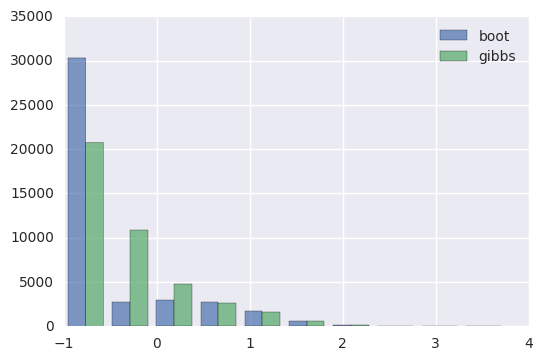

In [451]:
x = np.log10(sb.median(1).values+0.1)
y = np.log10(sg.median(1).values+0.1)
data = np.vstack([x, y]).T

plt.hist(data, alpha=0.7, label=['boot', 'gibbs'])
plt.legend(loc='upper right')

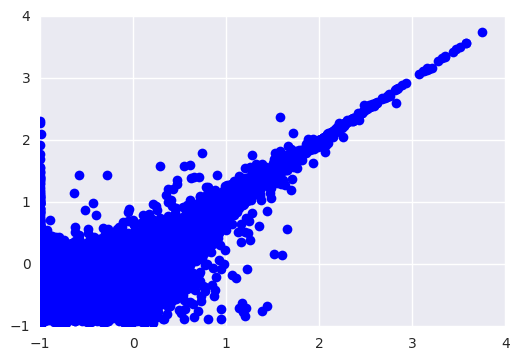

In [452]:
plt.plot(x,y, 'bo')

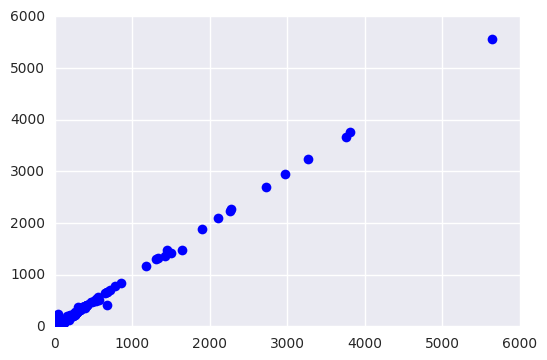

In [453]:
plt.plot(sb.median(1),sg.median(1), 'bo', alpha=1)

In [454]:
diff = sb.median(1) - sg.median(1)

In [512]:
[tn.index(i) for i in sg[diff<-80].index]

[25873, 29846, 36338, 37228, 82064]

In [511]:
sg[diff<-80].index

Index([u'ENST00000507593.5|ENSG00000113141.16|OTTHUMG00000163374.4|OTTHUMT00000372905.2|IK-009|IK|489|UTR5:1-67|CDS:68-489|',
       u'ENST00000472311.6|ENSG00000112695.11|OTTHUMG00000015049.8|OTTHUMT00000041246.2|COX7A2-006|COX7A2|325|UTR5:1-51|CDS:52-282|UTR3:283-325|',
       u'ENST00000635769.1|ENSG00000104763.18|OTTHUMG00000096997.18|OTTHUMT00000490015.1|ASAH1-015|ASAH1|575|UTR5:1-21|CDS:22-575|',
       u'ENST00000518495.5|ENSG00000078668.13|OTTHUMG00000164168.3|OTTHUMT00000377572.1|VDAC3-009|VDAC3|531|UTR5:1-69|CDS:70-243|UTR3:244-531|',
       u'ENST00000604804.5|ENSG00000089356.17|OTTHUMG00000184625.2|OTTHUMT00000468992.1|FXYD3-009|FXYD3|564|UTR5:1-55|CDS:56-406|UTR3:407-564|'],
      dtype='object', name=u'Name')

In [513]:
tr = 25873
print pd.concat([sb.loc[tn[tr]].rename('boots'), sg.loc[tn[tr]].rename('gibbs')], axis=1)

    boots       gibbs
0     0.0   88.129199
1     0.0   87.275212
2     0.0   78.526696
3     0.0   76.164192
4     0.0   43.240669
5     0.0   82.300816
6     0.0   86.166514
7     0.0   80.148787
8     0.0   81.074843
9     0.0   84.112263
10    0.0   85.001752
11    0.0    0.000521
12    0.0   82.063188
13    0.0  106.684875
14    0.0   78.878405
15    0.0   92.727985
16    0.0   10.930015
17    0.0   83.935470
18    0.0   75.947924
19    0.0   82.666430
20    0.0   89.310956
21    0.0   84.771240
22    0.0   87.723012
23    0.0   58.034057
24    0.0   98.951214
25    0.0   32.212697
26    0.0   54.018164
27    0.0   91.864658
28    0.0   78.521426
29    0.0   81.143843
..    ...         ...
70    0.0   81.372180
71    0.0   84.221003
72    0.0  109.079742
73    0.0   98.378724
74    0.0   97.660007
75    0.0   70.664282
76    0.0   87.747338
77    0.0   90.328556
78    0.0  126.208209
79    0.0   79.436045
80    0.0   76.454860
81    0.0  101.663176
82    0.0   98.752594
83    0.0 

#ALLL

In [514]:
boolList = [x in setBothTxps for x in tn] 
print sum(boolList)

42345


In [515]:
sb = b[boolList]
sg = g[boolList]

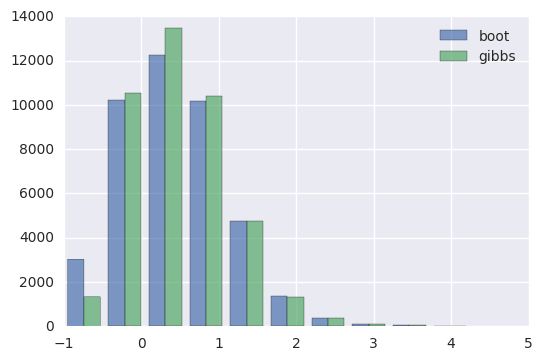

In [516]:
x = np.log10(sb.median(1).values+0.1)
y = np.log10(sg.median(1).values+0.1)
data = np.vstack([x, y]).T

plt.hist(data, alpha=0.7, label=['boot', 'gibbs'])
plt.legend(loc='upper right')

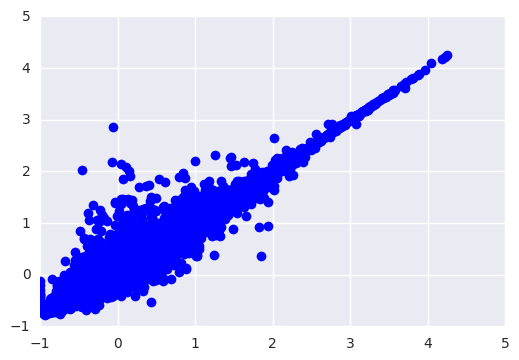

In [517]:
plt.plot(x,y, 'bo')

In [518]:
diff = sb.median(1) - sg.median(1)

In [536]:
[tn.index(i) for i in sg[diff<-1000].index]

[36483]

In [538]:
tr = 63819
print pd.concat([sb.loc[tn[tr]].rename('boots'), sg.loc[tn[tr]].rename('gibbs')], axis=1)

       boots       gibbs
0   0.779317  731.465331
1   0.771319  704.281256
2   0.405236  727.423025
3   0.391514  699.304509
4   0.400349  750.264231
5   0.796417  692.716693
6   1.179746  729.437299
7   1.210526  696.274437
8   2.026921  721.811367
9   0.000000  712.585279
10  1.202106  730.663316
11  2.441275  704.428886
12  0.382313  732.210478
13  1.543458  712.148211
14  1.198630  729.621514
15  0.394618  740.746221
16  0.398861  724.949154
17  0.791970  729.515415
18  0.772402  723.449754
19  0.396233  696.551376
20  0.399731  721.543696
21  0.797267  719.068946
22  0.399577  727.889711
23  0.776772  726.752105
24  1.925466  715.661732
25  0.786624  705.924468
26  0.797172  715.851747
27  0.391447  695.125679
28  0.400941  712.194154
29  0.790411  741.886503
..       ...         ...
70  1.529829  706.778426
71  1.573099  731.498000
72  0.390991  705.298345
73  0.402997  716.007659
74  1.979567  731.672700
75  0.000000  698.603204
76  0.000000  724.197670
77  0.800988  730.266033


(array([ 10.,  35.,   0.,  29.,  14.,   0.,   6.,   1.,   4.,   1.]),
 array([ 0.        ,  0.24412752,  0.48825503,  0.73238255,  0.97651007,
         1.22063759,  1.4647651 ,  1.70889262,  1.95302014,  2.19714766,
         2.44127517]),
 <a list of 10 Patch objects>)

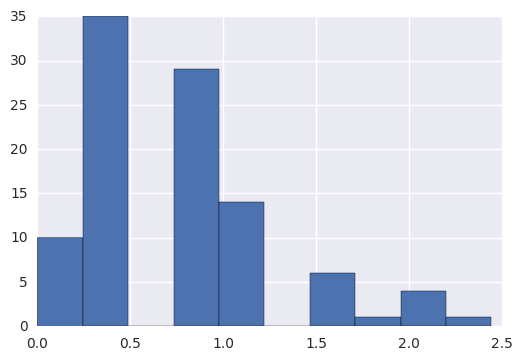

In [532]:
plt.hist(sb.loc[tn[tr]].values)


(array([  4.,   1.,   8.,  16.,  15.,  15.,  15.,  18.,   5.,   3.]),
 array([ 667.15778759,  675.46843197,  683.77907635,  692.08972073,
         700.40036511,  708.71100949,  717.02165387,  725.33229825,
         733.64294262,  741.953587  ,  750.26423138]),
 <a list of 10 Patch objects>)

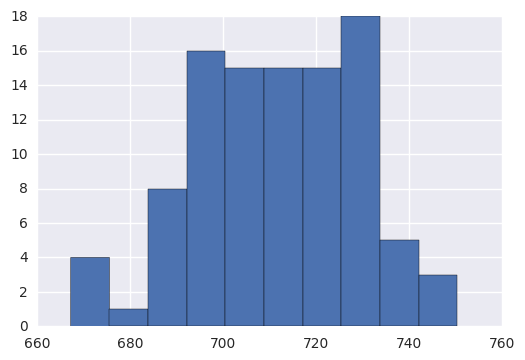

In [529]:
plt.hist(sg.loc[tn[tr]].values)

In [530]:
tn[tr]

'ENST00000561022.5|ENSG00000182718.16|OTTHUMG00000132763.5|OTTHUMT00000416481.1|ANXA2-022|ANXA2|834|UTR5:1-55|CDS:56-265|UTR3:266-834|'

In [535]:
min(diff)

-1510.3683669499987